In [1]:
from probes import LRProbe
from utils import DataManager
import torch as th

In [7]:
label_names = [
    "has_alice",
    "has_banana",
    "has_alice_xor_has_banana",
]
DEVICE = "auto"
if DEVICE == "auto":
    DEVICE = "cuda" if th.cuda.is_available() else "cpu"
model = "EleutherAI/pythia-70m-deduped"
all_accs = {}
for i in list(range(10)):
    revision = f"step{2**i}"
    accs = {}
    for label_name in label_names:
        dm = DataManager()
        for dataset in ["cities_alice_banana", "neg_cities_alice_banana"]:
            dm.add_dataset(
                dataset,
                model,
                4,
                label=label_name,
                center=False,
                split=0.8,
                device=DEVICE,
                revision=revision,
            )
        acts, labels = dm.get("train")
        probe = LRProbe.from_data(acts, labels, bias=True, device=DEVICE)
        acts, labels = dm.get("val")
        acc = (probe(acts).round() == labels).float().mean()
        accs[label_name] = acc
    all_accs[revision] = accs

/home/hugo/.conda/envs/geometry-of-truth/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



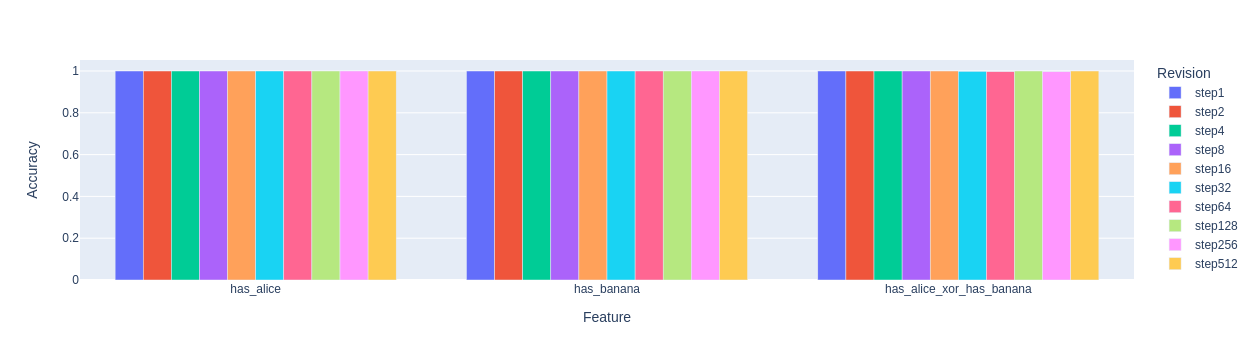

In [8]:
import plotly.express as px

all_accs_f = {k: {k2: v2.item() for k2, v2 in v.items()} for k, v in all_accs.items()}

fig = px.bar(all_accs_f, barmode='group')
fig.update_layout(xaxis_title="Feature", yaxis_title="Accuracy", legend_title="Revision")
fig.show()

In [15]:
label_names = [
    "has_alice",
    "has_banana",
    "has_alice_xor_has_banana",
]
DEVICE = "auto"
if DEVICE == "auto":
    DEVICE = "cuda" if th.cuda.is_available() else "cpu"
all_checkpoints = [0] + [2**i for i in range(10)] + [1000 * 2**i for i in range(8)] + [143_000]
model = "EleutherAI/pythia-70m-deduped"
all_accs_val = {}
all_accs_test = {}
for step in all_checkpoints:
    revision = f"step{step}"
    accs_val = {}
    accs_test = {}
    for label_name in label_names:
        dm = DataManager()
        for dataset in ["cities_alice_banana", "neg_cities_alice_banana"]:
            dm.add_dataset(
                dataset,
                model,
                4,
                label=label_name,
                center=False,
                #split=0.8,
                device=DEVICE,
                revision=revision,
            )

        dm.add_dataset(
            "companies_true_false_alice_banana",
            model,
            4,
            label=label_name,
            center=False,
            #split=0.8,
            device=DEVICE,
            revision=revision,
        )
        acts, labels = dm.get("companies_true_false_alice_banana")
        probe = LRProbe.from_data(acts, labels, bias=True, device=DEVICE)
        acts, labels = dm.get(["cities_alice_banana","neg_cities_alice_banana"])
        acc_val = (probe(acts).round() == labels).float().mean()
        accs_val[label_name] = acc_val
        acts, labels = dm.get("companies_true_false_alice_banana")
        acc_test = (probe(acts).round() == labels).float().mean()
        accs_test[label_name] = acc_test
    all_accs_val[revision] = accs_val
    all_accs_test[revision] = accs_test

/home/hugo/.conda/envs/geometry-of-truth/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



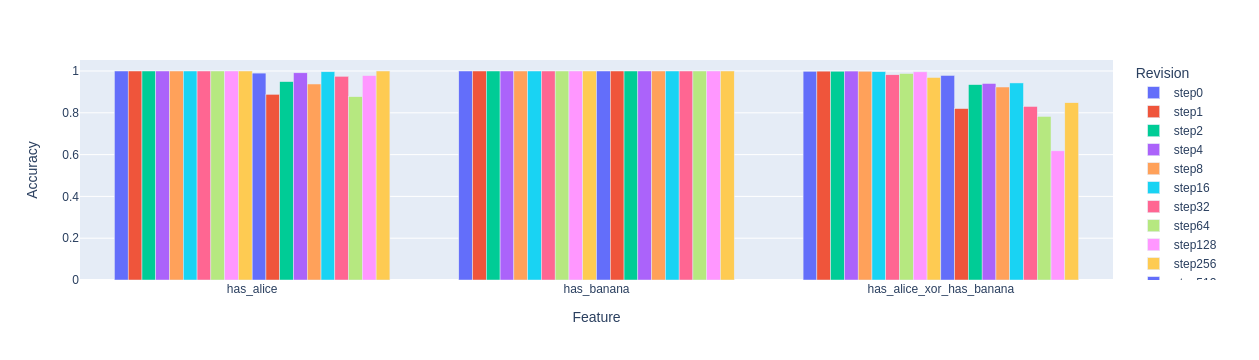

In [16]:
import plotly.express as px

all_accs_f = {k: {k2: v2.item() for k2, v2 in v.items()} for k, v in all_accs_val.items()}

fig = px.bar(all_accs_f, barmode='group')
fig.update_layout(xaxis_title="Feature", yaxis_title="Accuracy", legend_title="Revision")
fig.show()

/home/hugo/.conda/envs/geometry-of-truth/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



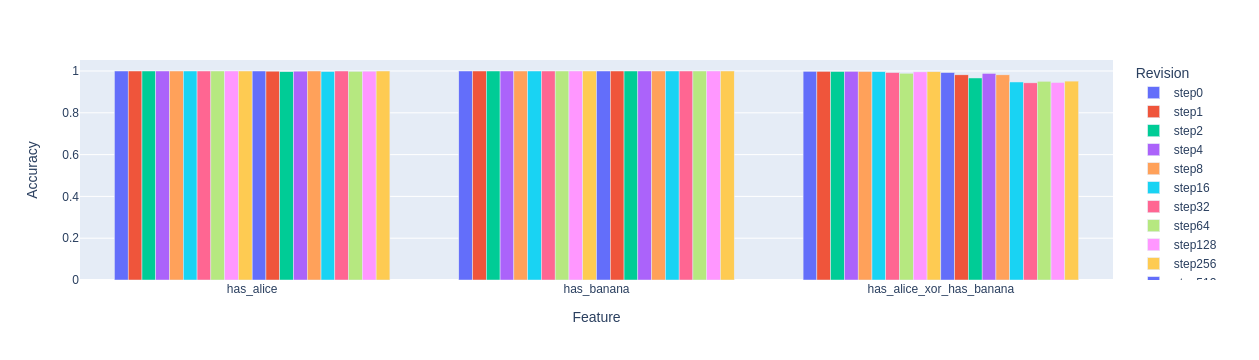

In [17]:
import plotly.express as px

all_accs_f = {k: {k2: v2.item() for k2, v2 in v.items()} for k, v in all_accs_test.items()}

fig = px.bar(all_accs_f, barmode='group')
fig.update_layout(xaxis_title="Feature", yaxis_title="Accuracy", legend_title="Revision")
fig.show()

In [18]:
label_names = [
    "has_alice",
    "has_not",
    "has_alice xor has_not",
]
DEVICE = "auto"
if DEVICE == "auto":
    DEVICE = "cuda" if th.cuda.is_available() else "cpu"
all_checkpoints = [0] + [2**i for i in range(10)] + [1000 * 2**i for i in range(8)] + [143_000]
model = "EleutherAI/pythia-70m-deduped"
all_accs_val = {}
all_accs_test = {}
for step in all_checkpoints:
    revision = f"step{step}"
    accs_val = {}
    accs_test = {}
    for label_name in label_names:
        dm = DataManager()
        for dataset in ["cities_alice", "neg_cities_alice"]:
            dm.add_dataset(
                dataset,
                model,
                4,
                label=label_name,
                center=False,
                split=0.8,
                device=DEVICE,
                revision=revision,
            )

        dm.add_dataset(
            "companies_true_false_has_not_alice",
            model,
            4,
            label=label_name,
            center=False,
            #split=0.8,
            device=DEVICE,
            revision=revision,
        )
        acts, labels = dm.get("train")
        probe = LRProbe.from_data(acts, labels, bias=True, device=DEVICE)
        acts, labels = dm.get("val")
        acc_val = (probe(acts).round() == labels).float().mean()
        accs_val[label_name] = acc_val
        acts, labels = dm.get("companies_true_false_has_not_alice")
        acc_test = (probe(acts).round() == labels).float().mean()
        accs_test[label_name] = acc_test
    all_accs_val[revision] = accs_val
    all_accs_test[revision] = accs_test

Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.28it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.21it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:16<00:00,  1.18it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.36it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.26it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:15<00:00,  1.19it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.41it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.34it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:16<00:00,  1.18it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.39it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.34it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:15<00:00,  1.22it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.41it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.33it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:15<00:00,  1.20it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.41it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.32it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:15<00:00,  1.20it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.40it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.27it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:18<00:00,  1.04it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.30it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.30it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:16<00:00,  1.16it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.47it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.30it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:15<00:00,  1.23it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.53it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.32it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:16<00:00,  1.15it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.42it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.38it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:17<00:00,  1.06it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.01it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.94it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.01s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.96it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.91it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.00s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.98it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.92it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.02s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.99it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.90it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.03s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.98it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.93it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.02s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.02it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.88it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.01s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.02it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.91it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:19<00:00,  1.02s/it]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.01it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.93it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:18<00:00,  1.00it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.99it/s]


Loading model EleutherAI/pythia-70m-deduped...


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:12<00:00,  1.90it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading model EleutherAI/pythia-70m-deduped...


Generating activations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:18<00:00,  1.01it/s]


/home/hugo/.conda/envs/geometry-of-truth/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



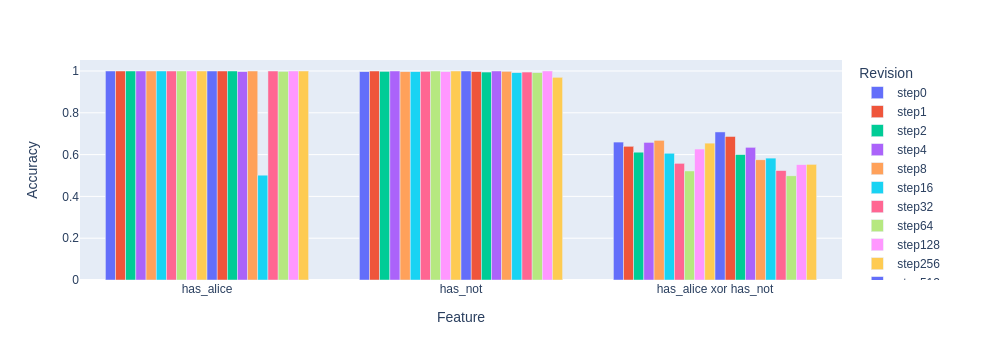

In [19]:
import plotly.express as px

all_accs_f = {k: {k2: v2.item() for k2, v2 in v.items()} for k, v in all_accs_val.items()}

fig = px.bar(all_accs_f, barmode='group')
fig.update_layout(xaxis_title="Feature", yaxis_title="Accuracy", legend_title="Revision")
fig.show()

/home/hugo/.conda/envs/geometry-of-truth/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



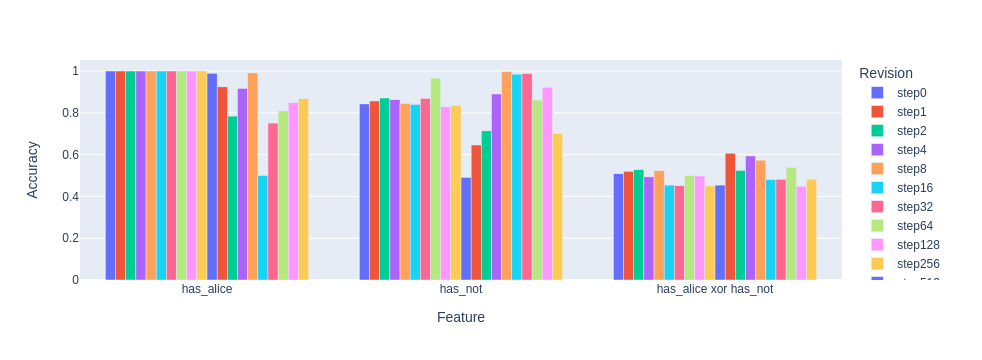

In [20]:
import plotly.express as px

all_accs_f = {k: {k2: v2.item() for k2, v2 in v.items()} for k, v in all_accs_test.items()}

fig = px.bar(all_accs_f, barmode='group')
fig.update_layout(xaxis_title="Feature", yaxis_title="Accuracy", legend_title="Revision")
fig.show()